In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

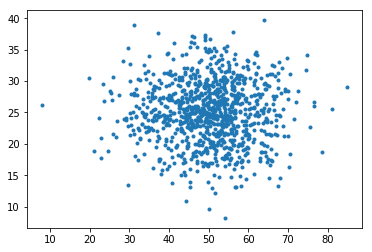

In [2]:
mu1 = 50
sigma1 = 10

mu2 = 25
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')

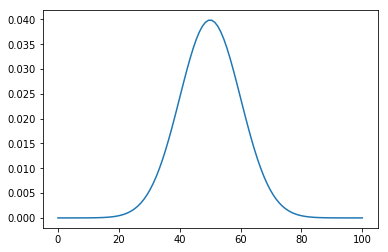

In [3]:
z = np.linspace(0,100,100)
pdf = norm_rv1.pdf(z)

plt.plot(z, pdf)

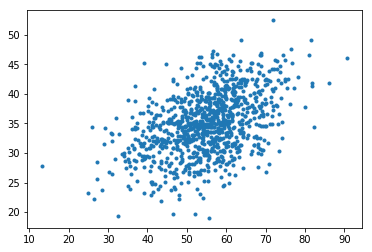

In [4]:
X = np.vstack((x, y)).T
C = np.array([[1, 0.2], [0.2, 1]])
X2 = X.dot(C)
plt.scatter(X2[:,0], X2[:,1], marker='.')

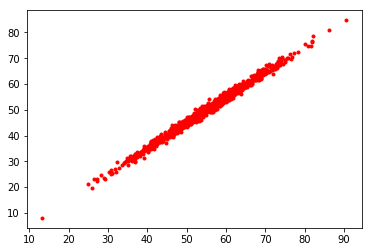

In [5]:
plt.plot(X2[:,0],X[:,0],'r.')

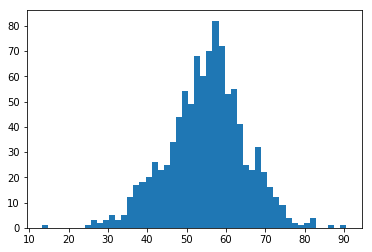

In [6]:
plt.hist(X2[:,0],50)
plt.show()

In [7]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(X[:,0], X2[:,0])
print(corr)

# сorr > 0: при возрастании одной велечины вторая тоже увеличивается
# сorr < 0: при возрастании одной велечины вторая уменьшается
# сorr = 0: значения не зависят друг ото друга

0.9950788846461042


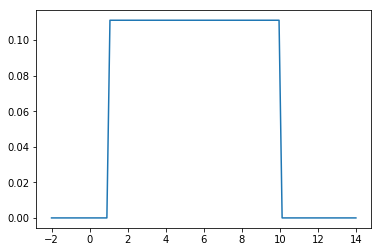

In [8]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

z = np.linspace(-2, 14, 100)
pdf = uniform_rv.pdf(z)
plt.plot(z, pdf)

In [9]:
import io
import requests
url = "http://yustiks.ru/avocado.csv"
df = pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


          0         1
0  0.001026  0.000046
1  0.000877  0.000030
2  0.001890  0.000035
3  0.001262  0.000050
4  0.000815  0.000041


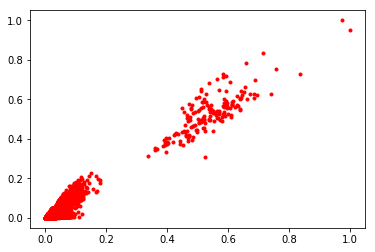

In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', '4046']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

volume = df_norm[0]
bags = df_norm[1]
plt.plot(volume, bags, 'r.')